# Courbes elliptiques

## De quoi sont les courbes elliptiques ?

Pour faire court, ce sont, du troisième degré, les courbes planes non singulières, autrement dit, les courbes définies par une équation $P(x,y)=0$, où $P$ est un polynôme de degré 3 en au moins une des variables, et qui admettent en chaque point une tangente unique (ce qui exclut par exemple le folium de Descartes $x^3+y^3=3axy$ (un point double : cubique nodale) ou la parabole semi-cubique $y^2−x^3=0$ (une tangente double au point anguleux), ainsi que toutes le courbes qui se décomposent en une droite et une conique.

On peut faire quelques dessins avec jupyter, sympy et matplotlib.

In [1]:
from sympy import *
from sympy.plotting import plot, plot_parametric
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

In [3]:
var('x y')

(x, y)

Par exemple,
$$y^2=x^3-3x$$
est une courbe elliptique :

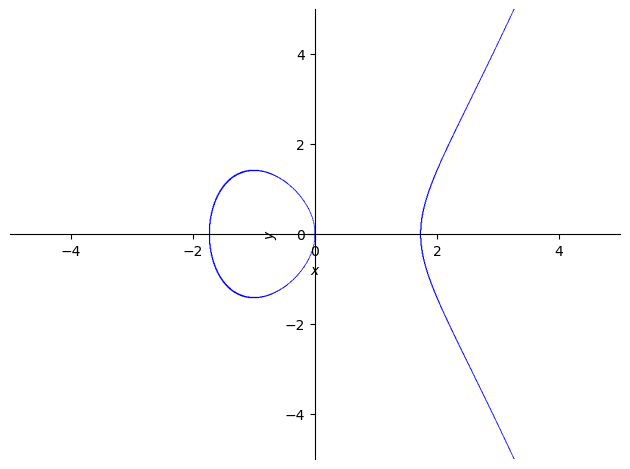

In [4]:
# Une courbe elliptique
p1 = plot_implicit(Eq(y**2,x**3-3*x))

Le *folium de Descartes*
$$x^3+y^3=6xy$$
n'en est pas une. C'est le logo de la cité Descartes (regarder les panneaux).

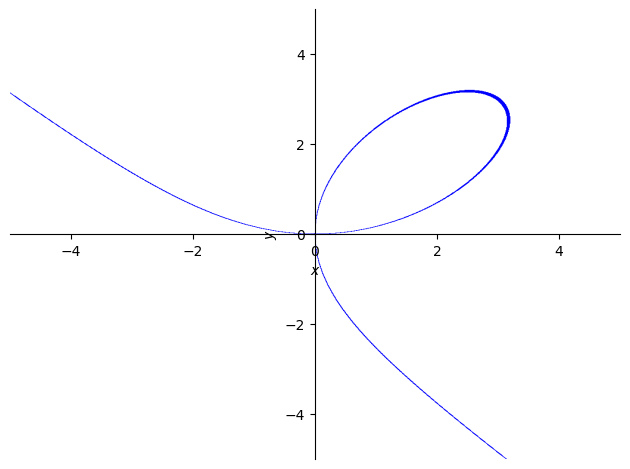

In [5]:
# Folium de Descartes
p2 = plot_implicit(Eq(x**3+y**3,6*x*y))

La *parabole semi-cubique*
$$y^2=x^3$$
n'en est pas une non plus (point anguleux) :

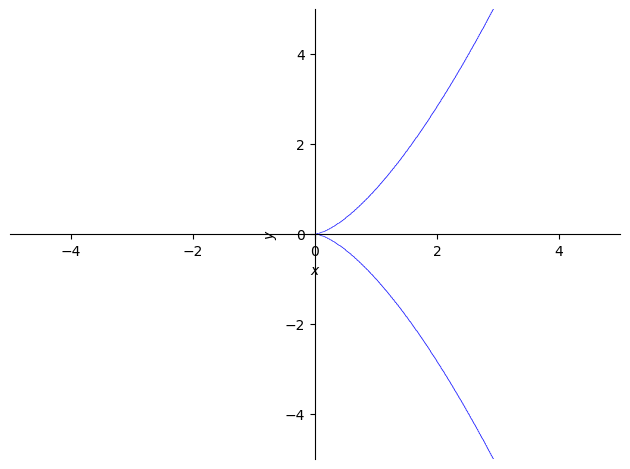

In [6]:
# Parabole semi-cubique
p3 = plot_implicit(Eq(y**2-x**3,0))

Un autre forme possible pour une courbe elliptique  (en un seul morceau)
$$y^2=x^3-x+1$$

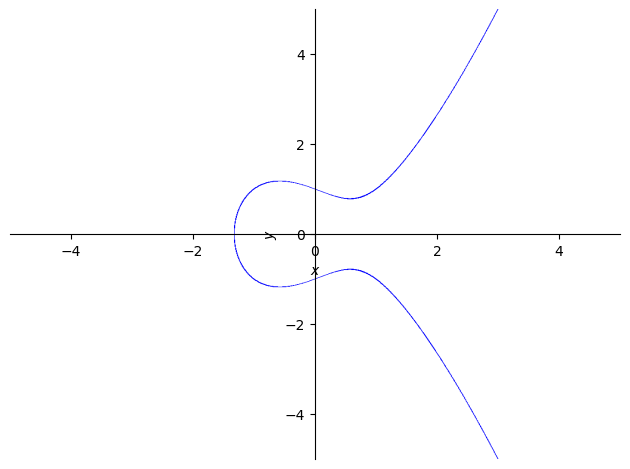

In [7]:
# Autre courbe elliptique
p4 = plot_implicit(Eq(y**2,x**3-x+1))

La classification des courbes planes du troisième degré, commencée par Newton au XVIIème siècle,  est [très compliquée](https://en.wikipedia.org/wiki/Cubic_plane_curve), et fait même encore l'objet de travaux récents.
 

Pour simplifier les choses, les mathématiciens leur rajoutent deux sortes de points : les *points imaginaires* et les *points à l'infini*. La définition des points imaginaires est naturelle : on autorise les variables $x,y$ à prendre des valeurs complexes, et on voit donc la courbe comme un sous-ensemble de ${\mathbb C}^2$. 

La définition des points à l'infini est un peu plus subtile : on imagine notre plan comme étant le plan $z=1$ dans l'espace à 3 dimensions, on remplace l'équation de la courbe par celle du cône d'origine O qui s'appuie sur elle, un polynôme homogène du troisième degré $\hat P(x,y,z)=0$, tel que $\hat P(x,y,1)=P(x,y)$. 

Par exemple, pour la courbe elliptique $y^2+x^3+x=0$, on a l'équation (dite projective) $y^2z+x^3+xz^2=0$. On identifie deux triplets $(x,y,z)$ et $(x′,y′,z′)$ s'il sont proportionnels : $(x′,y′,z′)=(ax,ay,az)$. L'ensemble des classes de triplets non nuls de nombres complexes est appelé *plan projectif complexe*. Ceux pour lesquels $z\not=0$ correspondent aux points ordinaires de notre courbe. Ceux pour lesquels $z=0$ sont nouveaux, ce sont les points à l'infini. 


Pourquoi cette construction ? L'introduction des points imaginaires permet d'éliminer les discussions sur le nombre de racines des équations. Celle des points à l'infini élimine la question des asymptotes. Par exemple, la classification projective des courbes du second degré ne contient plus que trois cas. En effet, un polynôme homogène de degré 2 peut soit ne pas se factoriser (une conique), soit être un produit de deux polynômes du premier degré distincts (deux droites sécantes), soit enfin être le carré d'un polynôme du premier degré (une droite double). Au niveau projectif, il n'y a plus de distinction entre les trois types de coniques. Si on choisit une projection (par exemple le plan $z=1$) pour regarder la courbe, alors, elle pourra ne pas avoir de point à l'infini réel (ellipse), en avoir un (parabole) ou deux (hyperbole). On ne distingue pas non plus les droites sécantes ou parallèles (les parallèles se coupent à l'infini), etc. Donc, en [géométrie projective](https://fr.wikipedia.org/wiki/G%C3%A9om%C3%A9trie_projective), c'est beaucoup plus simple.


## Pourquoi elliptiques ?

C'est parce qu'elles sont paramétrables par des fonctions
spéciales appelées [fonctions elliptiques](http://fr.wikipedia.org/wiki/Fonction_elliptique)
(il restera à expliquer le nom de ces fonctions).

Dans un sens, les fonctions elliptiques généralisent les fonctions
circulaires. Les coniques sont paramétrables par des fonctions
circulaires (ou hyperboliques), par exemple une ellipse sera
$x=a\cos\theta, y=b\sin\theta$. 
On ne les appelle pas pour autant
courbes circulaires, car elles sont en fait paramétrables par des
fonctions *rationnelles* :
si $t=\tan\frac{\theta}{2}$, on a $\cos\theta=\frac{1-t^2}{1+t^2}$ et $\sin\theta=\frac{2t}{1+t^2}$
. On les
appelle donc *courbes rationnelles*.

Il n'y a pas que les coniques qui soient rationnelles. Certaines cubiques le sont aussi.
Par exemple, en posant $y=tx$ dans l'équation du folium de Descartes, on trouve  $(t^3+1)x^3 = 3atx^2$
et on a donc le paramètrage  $x = \frac{3at}{t^3+1}$, $y=\frac{3at^2}{t^3+1}$. De même, la parabole semi-cubique
se paramètre par $x=t^2$, $y=t^3$.

## Et les fonctions elliptiques, alors  ?

Leur nom vient du fait qu'elles peuvent être définies comme les
fonctions réciproques des [intégrales elliptiques](http://fr.wikipedia.org/wiki/Intégrale_elliptique), qui ont enfin quelque chose à voir avec les ellipses : si on essaie de calculer la longueur d'un arc d'ellipse,
on tombe sur une intégrale elliptique. 



Il y a plusieurs versions de
la théorie des fonctions elliptiques. La plus utilisée en physique
ou en ingénierie est [celle de Jacobi](https://fr.wikipedia.org/wiki/Fonction_elliptique_de_Jacobi).

Elle permet d'exprimer les solutions de nombreuses équations différentielles, comme celle des grandes oscillations du
pendule, par exemple (et la période est alors donnée par une intégrale elliptique).

Mais la version qui nous intéresse pour la cryptographie est [celle de Weierstrass](http://fr.wikipedia.org/wiki/Fonction_elliptique_de_Weierstrass).

Sachant, de par les travaux de ses prédécesseurs, que les extensions au plan complexe des fonctions elliptiques sont doublement périodiques : 
elles vérifient 
$$f(z+n\omega_1+m\omega_2)=f(z)$$
pour tous $(m,n)\in{\mathbb Z}^2$ et tout $z\in{\mathbb C}$ pour lequel
$f(z)$ est défini, où $\omega_1,\omega_2$ sont deux nombres complexes dont le rapport n'est pas réel, 
Weierstrass s'est demandé s'il existait un moyen simple de construire directement de telles fonctions doublement périodiques. Son raisonnement est bien expliqué dans l'article de Wikipédia. L'idée est de partir d'une fonction
quelconque $f$ et de former la somme infinie
$$F(z)=\sum_{m,n\in{\mathbb Z}} f(z+n\omega_1+m\omega_2)$$


Si la série converge, $F$ sera doublement périodique. Il faut donc que $f$ tende assez vite vers 0 à l'infini. La construction
marche avec $f(z)=z^{-3}$, mais on peut faire mieux en bricolant un peu la série associée à $f(z)=z^{-2}$. Telle quelle, elle ne
converge pas, mais en retranchant à chaque terme son équivalent asymptotique, on peut montrer que ça marche encore. Le résultat est
la fameuse fonction 
$$\wp(z) = {1\over z^2} + {\sum_{(n_1,n_2)\not = (0,0)}}\left[
{1\over (z+n_1\omega_1+n_2\omega_2)^2} - {1\over
(n_1\omega_1+n_2\omega_2)^2}\right]$$

(le caractère $\wp$ n'appartient à aucune police connue, il a été
réalisé spécialement pour Weierstrass)


On peut maintenant rentrer dans le vif du sujet. En développant chaque terme de la série en série de puissances de $z$, on peut montrer que la fonction $\wp$ vérifie l'équation différentielle

$$\wp'(z)^2=4\wp(z)^3-g_2\wp(z)-g_3$$

où $g_2=60G_4$ et $g_3=140G_6$, avec

$$G_k={\sum_{(m,n)\not=(0,0)}}{1\over (m\omega_1+n\omega_2)^k}$$

et

$$\wp(z)={1\over z^2}+\sum_{k\ge 2}(2k-1)G_{2k}(\tau)z^{2k-2}$$

Donc, $x=\wp(t), y=\wp'(t)$ fournit directement un paramétrage de la courbe elliptique 
$$y^2=4x^3-g_2x-g_3$$ 
Un peu de géométrie projective élémentaire permet de montrer que toute courbe elliptique admet une équation de cette forme dans un repère approprié. La fonction de Weierstrass fournit donc une méthode simple et élégante pour paramétrer les courbes elliptiques par des fonctions elliptiques.

Elle montre en particulier qu'on peut *additionner* les points
d'une courbe elliptique ! Si $P_1 = (\wp(t_1),\wp'(t_1))$ et
$P_2=(\wp(t_2),\wp'(t_2))$, on peut poser 

$$P_1\oplus P_2 = (\wp(t_1+t_2),\wp'(t_1+t_2))$$

Cette opération définit une structure de groupe commutatif sur la
courbe.  

On peut vérifier que géométriquement, la somme est le
symétrique par rapport à l'axe horizontal du troisième point
d'intersection de la droite passant par $P_1,P_2$ avec la courbe
(c'est souvent présenté comme la définition de l'addition sur la
courbe, ce qui n'est pas franchement naturel...), et que l'élément
neutre est son point à l'infini.

Il reste à la calculer (c'est le théorème d'addition pour la
fonction $\wp$). Ce n'est pas évident, mais on aboutit à un
résultat intéressant : les coordonnées (projectives) de $P_1\oplus P_2$ sont
des fonctions rationnelles <I>à coefficients entiers</I> des
coordonnées de $P_1$ et $P_2$ :

Si l'on pose
$$s = \frac{y_2-y_1}{x_2-x_1}$$
les coordonnées $(x_3,y_3)$ de $P_1\oplus P_2$ sont
$$
x_3 = s^2-x_1-x_2
$$
$$
y_3 = s(x_1-x_3) - y_1.
$$
Il faut traiter séparément le cas où $P_1=P_2$. Les fomules sont les mêmes, mais avec
$$s = \frac{3x_1^2+a}{2y_1.}$$

On trouvera le calcul <A HREF="ell_add_new.html">ici</A>.</P>
En fait, le théorème d'addition pour la fonction $\wp$ s'obtient en remarquant que si $t_3$ est le paramètre du troisème point d'intersection $P_3$ de la droite $(P_1P_2)$ avec la courbe, alors $t_1+t_2+t_3\in{\mathbb Z}\omega_1\oplus{\mathbb Z}\omega_2$.
C'est une conséquence simple de résultats généraux sur les zéros et les pôles d'une fonction elliptique.


## Courbes elliptiques sur les corps finis

On peut donc appliquer les formules d'addition à la courbe modulo un nombre
premier $p$, c'est à dire à l'ensemble des solutions de
l'équation projective dans $({\mathbb Z}/p{\mathbb Z})^3$. Dans
les bons cas, on obtiendra un très grand groupe dans lequel le
problème du logarithme discret est encore beaucoup plus difficile
que dans un corps fini (à cause de la non-linéarité des fomules
d'addition). 

Le [système proposé](http://en.wikipedia.org/wiki/Elliptic_curve_cryptography)
(indépendamment par Koblitz et Miller) est
donc essentiellement un ElGamal dans le groupe d'une courbe
elliptique modulo un grand nombre premier. Par rapport au RSA, il
permet d'avoir des clés plus courtes à sécurité équivalente.

On notera que, si la description du RSA est relativement simple, le
choix des clés n'est pas trivial. Pour les courbes elliptiques,
c'est encore plus complexe. Il est donc recommandé d'utiliser les
courbes proposées dans divers standards.





In [17]:
from ent3 import *

Par exemple, la courbe elliptique
$$y^2=x^3+x$$
sur ${\mathbb F}_{23}={\mathbb Z}/{\mathbb 23 Z}$ est formée des couples d'entiers modulo 23 suivants :

In [18]:
C = [(x,y) for x in range(23) for y in range(23) if (pow(y,2,23)-pow(x,3,23)-x) %23==0]
print(C)
len(C)

[(0, 0), (1, 5), (1, 18), (9, 5), (9, 18), (11, 10), (11, 13), (13, 5), (13, 18), (15, 3), (15, 20), (16, 8), (16, 15), (17, 10), (17, 13), (18, 10), (18, 13), (19, 1), (19, 22), (20, 4), (20, 19), (21, 6), (21, 17)]


23

In [19]:
E = (1,0,23) # On donne a,b,p

In [20]:
ellcurve_add(E,(11,13), (19,1))

(1, 18)

In [21]:
s = (1-13)*inversemod(19-11,23) % 23;s

10

In [22]:
(s*s - 11 - 19)%23

1

In [23]:
(s*(11-1)-13) %23

18

Cette courbe est d'ordre 24 (avec le point à l'infini, de coordonnées homogènes  $(0:1:0)$). 

In [24]:
G = (1,5)
for i in range(23): print(ellcurve_mul(E, i,G), end=' ')

Identity (1, 5) (0, 0) (1, 18) Identity (1, 5) (0, 0) (1, 18) Identity (1, 5) (0, 0) (1, 18) Identity (1, 5) (0, 0) (1, 18) Identity (1, 5) (0, 0) (1, 18) Identity (1, 5) (0, 0) 

In [25]:
# Le groupe est cyclique malgré tout
G = (11,13)
for i in range(25): print(ellcurve_mul(E, i,G), end=' ')

Identity (11, 13) (13, 5) (15, 3) (9, 5) (19, 1) (1, 18) (17, 13) (18, 10) (20, 4) (16, 15) (21, 6) (0, 0) (21, 17) (16, 8) (20, 19) (18, 13) (17, 10) (1, 5) (19, 22) (9, 18) (15, 20) (13, 18) (11, 10) Identity 

Le code pour manipuler les courbes elliptiques n'est pas compliqué. Voici la formule d'addition :

In [26]:

def ellcurve_add(E, P1, P2):
    """
    Returns the sum of P1 and P2 on the elliptic 
    curve E.
    Input:
         E -- an elliptic curve over Z/pZ, given by a 
              triple of integers (a, b, p), with p odd.
         P1 --a pair of integers (x, y) or the 
              string "Identity".
         P2 -- same type as P1
    Output:
         R -- same type as P1
    Examples:
    >>> E = (1, 0, 7)   # y**2 = x**3 + x over Z/7Z
    >>> P1 = (1, 3); P2 = (3, 3)
    >>> ellcurve_add(E, P1, P2)
    (3, 4)
    >>> ellcurve_add(E, P1, (1, 4))
    'Identity'
    >>> ellcurve_add(E, "Identity", P2)
    (3, 3)
    """ 
    a, b, p = E
    assert p > 2, "p must be odd."
    if P1 == "Identity": return P2
    if P2 == "Identity": return P1
    x1, y1 = P1; x2, y2 = P2
    x1 %= p; y1 %= p; x2 %= p; y2 %= p
    if x1 == x2 and y1 == p-y2: return "Identity"
    if P1 == P2:
        if y1 == 0: return "Identity"
        lam = (3*x1**2+a) * inversemod(2*y1,p)
    else:
        lam = (y1 - y2) * inversemod(x1 - x2, p)
    x3 = lam**2 - x1 - x2
    y3 = -lam*x3 - y1 + lam*x1
    return (x3%p, y3%p)


Testons sur la courbe P-256 du NIST :

In [27]:
a = 115792089210356248762697446949407573530086143415290314195533631308867097853948
b = 41058363725152142129326129780047268409114441015993725554835256314039467401291
p = 2**256-2**224+2**192+2**96-1

Son équation est 
$$y^2=x^3+ax+b\ {\rm mod}\ p$$

Voici un point de la courbe :

In [28]:
xP=48439561293906451759052585252797914202762949526041747995844080717082404635286
yP=36134250956749795798585127919587881956611106672985015071877198253568414405109

In [29]:
pow(yP,2,p) == (pow(xP,3,p) + a*xP + b) % p

True

Et un autre :

In [30]:
xQ=91120319633256209954638481795610364441930342474826146651283703640232629993874
yQ=80764272623998874743522585409326200078679332703816718187804498579075161456710

pow(yQ,2,p) == (pow(xQ,3,p) + a*xQ + b) % p

True

In [31]:
E = (a,b,p)
P = (xP,yP)
Q = (xQ,yQ)
ellcurve_add(E,P,Q)

(90311347416124380843053629782909799863811022113695181534556410735564918416699,
 4439786493922664689351604000024584586041837813305394846042624716681282749942)

Il faut aussi définir la multiplication $P\rightarrow nP$ par un entier :

In [32]:
def ellcurve_mul(E, m, P):
    """
    Returns the multiple m*P of the point P on 
    the elliptic curve E.
    Input:
        E -- an elliptic curve over Z/pZ, given by a 
             triple (a, b, p).
        m -- an integer
        P -- a pair of integers (x, y) or the 
             string "Identity"
    Output:
        A pair of integers or the string "Identity".
    Examples:
    >>> E = (1, 0, 7)
    >>> P = (1, 3)
    >>> ellcurve_mul(E, 5, P)
    (1, 3)
    >>> ellcurve_mul(E, 9999, P)
    (1, 4)
    """   
    assert m >= 0, "m must be nonnegative."
    power = P
    mP = "Identity"
    while m != 0:
        if m%2 != 0: mP = ellcurve_add(E, mP, power)
        power = ellcurve_add(E, power, power)
        m //= 2
    return mP


In [33]:
ellcurve_mul(E,2,P)

(56515219790691171413109057904011688695424810155802929973526481321309856242040,
 3377031843712258259223711451491452598088675519751548567112458094635497583569)

Il n'est pas évident de calculer le nombre de points de cette courbe. Le système sage connaît des algorithmes sophistiqués :

```Python
sage: E = EllipticCurve([GF(p)(0),0,0,a,b])
sage: E.abelian_group()
Additive abelian group isomorphic to Z/115792089210356248762697446949407573529996955224135760342422259061068512044369 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + 115792089210356248762697446949407573530086143415290314195533631308867097853948*x + 41058363725152142129326129780047268409114441015993725554835256314039467401291 over Finite Field of size 115792089210356248762697446949407573530086143415290314195533631308867097853951
```
Ainsi cette courbe est d'ordre
$$q=115792089210356248762697446949407573529996955224135760342422259061068512044369$$

C'est un nombre premier. Donc, le groupe de la courbe est cyclique, et il existe un entier $m$
tel que $Q=mP$.

Il est en pratique impossible de le calculer, mais la question de savoir si $m$
n'avait pas été choisi par la NSA a fait [beaucoup jaser](https://en.wikipedia.org/wiki/Dual_EC_DRBG#cite_note-blog.0xbadc0de.be-31) il y a quelques années.

Ce sera l'objet du dernier TD.


### Paramètres de domaine

Les paramètres à fourinir sont les suivants. Le nombre premier $p$
qui définit le corps de base, les coefficients a et b de l'équation $y^2=x^3+ax+b$, un point $G$ générateur d'un grand sous-groupe, et son ordre $n$, en général premier. Le théorème de Lagrange entraîne que le nombre $h=\frac1n|E({\mathbb F}_p)|$ est un entier. On demande que ce nombre, appelé le cofacteur, soit petit $h≤4$) et de préférence h=1

Les paramètres de domaine sont donc $(p,a,b,G,n,h)$.



Il n'est pas facile de calculer le nombre de points de la courbe, ni de vérifier l'abscence de faiblesses éventuelles. On utilise donc en général des courbes standardisées.

Il n'est pas évident de calculer le nombre de points de la courbe. Le système `sage` connaît des algorithmes sophistiqués :
```sage
sage: E = EllipticCurve([GF(p)(0),0,0,a,b])
sage: E.abelian_group()
Additive abelian group isomorphic to Z/115792089210356248762697446949407573529996955224135760342422259061068512044369 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + 115792089210356248762697446949407573530086143415290314195533631308867097853948*x + 41058363725152142129326129780047268409114441015993725554835256314039467401291 over Finite Field of size 115792089210356248762697446949407573530086143415290314195533631308867097853951
```

Ainsi cette courbe est d'ordre
$$q = 115792089210356248762697446949407573529996955224135760342422259061068512044369 $$

C'est un nombre premier. Donc, le groupe de la courbe est cyclique, et il existe un entier $m$ tel que $Q=mP$.

Il est en pratique impossible de le calculer, mais la question de savoir si $m$ n'avait pas été choisi par la NSA a fait [beaucoup jaser](https://en.wikipedia.org/wiki/Dual_EC_DRBG#cite_note-blog.0xbadc0de.be-31) il y a quelques années.

Ce sera l'objet du dernier TD.


### Le cryptosystème

Avec les paramètres publics, ci-dessus, la clé secrète d'un utilisateur est un entier $m$, et sa clé publique le point $P=mG$.

Les messages à chiffrer doivent être représentés par des points $M$ de la courbe.

Pour chiffrer $M$, on tire au hasard un entier $k$, et on calcule 
$$(C_1,C_2)=(kG,M\oplus kP)$$

Pour déchiffrer : 
$$M=C_2\ominus mC_1.$$

### ECDH (Elliptic Curve Diffie-Hellemann)

A envoie $aG$ à $B$, $B$ envoie $bG$ à A, et les deux calculent $K=abG$.


### ECDSA (Elliptic Curve Digital Signature Algorithm)
#### Signature

Pour signer un hachage $h$,
- choisir de manière aléatoire un nombre $k$ entre 1 et $n−1$
- calculer $(i,j)=kG$
- calculer $x = i\mod n$; si $x=0$ revenir à la première étape
- calculer $y=k^{−1}(h+sx)\mod n$; si $y=0$ revenir à la première étape

La signature est le couple $(x,y)$.


#### Vérification
- vérifier que $P$ est différent de $O$
- Vérifier que $nP$ donne $O$
- contrôler que $x$ et $y$ sont bien entre 1 et $n−1$
- calculer $(i,j)=(hy^{−1}\mod n)G+(xy^{−1}\mod n)P$
- vérifier que $x=i\mod n$.



### Exemple

Détails de la vérification de la signature du faux pass sanitaire d'Hitler.

On reprend la clé publique et la signature sur le document précédent.


In [34]:
import ecdsa
keypem = 'MFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAEgu/WJBn1Q+RCOfQx3NLT5oIGUCHsqSRXuu7EZsqfqZN5PvHk6/E++88wvj2fMrfmAptk5tVld2xBH4P4tRs8JQ=='

vk  = ecdsa.VerifyingKey.from_pem(keypem, hashfunc=ecdsa.util.sha256)
print(keypem)
print(vk)

MFkwEwYHKoZIzj0CAQYIKoZIzj0DAQcDQgAEgu/WJBn1Q+RCOfQx3NLT5oIGUCHsqSRXuu7EZsqfqZN5PvHk6/E++88wvj2fMrfmAptk5tVld2xBH4P4tRs8JQ==
VerifyingKey.from_string(b'\x03\x82\xef\xd6$\x19\xf5C\xe4B9\xf41\xdc\xd2\xd3\xe6\x82\x06P!\xec\xa9$W\xba\xee\xc4f\xca\x9f\xa9\x93', NIST256p, sha256)


In [35]:
sg = b'\xf8\xe4=~\x98\x0c\xc6\x18\x91\xe2\t\xfc\x8e\xa8C\x0b\xd3\xe8\x8a\xe1\xee\xda\x9e1*\xe1\xce^\xfa\xf2,E\x164o\xef\t\xaf\x00WY\x9e\xa6\xb0N\xa7\xe2\xb0\xf0\xbb\xb0x\x020\xe0\xfa\xf0\xe7\xaf\xaa\x9e\xabj]'
print(sg)

b'\xf8\xe4=~\x98\x0c\xc6\x18\x91\xe2\t\xfc\x8e\xa8C\x0b\xd3\xe8\x8a\xe1\xee\xda\x9e1*\xe1\xce^\xfa\xf2,E\x164o\xef\t\xaf\x00WY\x9e\xa6\xb0N\xa7\xe2\xb0\xf0\xbb\xb0x\x020\xe0\xfa\xf0\xe7\xaf\xaa\x9e\xabj]'


In [36]:
# ordre de la courbe
q=115792089210356248762697446949407573529996955224135760342422259061068512044369
x,y = ecdsa.util.sigdecode_string(sg,q)
print(x)
print(y)

112576851998912693404353932021788403678010647881836694883786474447117814475845
10043531254491885728639917010112825819310590278507613083131603450074657155677


In [37]:
# le message à signer
msg = b'\x84jSignature1M\xa2\x01&\x04H\xe7qN\x8d\x7f\xf8h\x9b@X\xe2\xa4\x01dCNAM\x04\x1ae)\xbd\xe0\x06\x1aaw*\xfe9\x01\x03\xa1\x01\xa4av\x81\xaabcix\x1dURN:UVCI:01:FR:T5DWTJYS4ZR8#4bcobFRbdn\x02bdtj2021-10-01bisdCNAMbmamORG-100030215bmplEU/1/20/1528bsd\x02btgi840539006bvpgJ07BX03cdobj1900-01-01cnam\xa4bfnfHITLERbgneADOLFcfntfHITLERcgnteADOLFcvere1.3.0'
print(msg)


b'\x84jSignature1M\xa2\x01&\x04H\xe7qN\x8d\x7f\xf8h\x9b@X\xe2\xa4\x01dCNAM\x04\x1ae)\xbd\xe0\x06\x1aaw*\xfe9\x01\x03\xa1\x01\xa4av\x81\xaabcix\x1dURN:UVCI:01:FR:T5DWTJYS4ZR8#4bcobFRbdn\x02bdtj2021-10-01bisdCNAMbmamORG-100030215bmplEU/1/20/1528bsd\x02btgi840539006bvpgJ07BX03cdobj1900-01-01cnam\xa4bfnfHITLERbgneADOLFcfntfHITLERcgnteADOLFcvere1.3.0'


La courbe NIST-P256 a pour équation 
$$y^2=x^3+ax+b\mod p$$
avec 
$$p=p_{256}=2^{256}−2^{224}+2^{192}+2^{96}−1$$
et les valeurs de $a$ et $b$ ci-dessous :

In [38]:
p = 2**256 - 2**224 + 2**192 + 2**96 - 1
a = 115792089210356248762697446949407573530086143415290314195533631308867097853948
b = 41058363725152142129326129780047268409114441015993725554835256314039467401291
        # Nombre de points de la courbe
q = 115792089210356248762697446949407573529996955224135760342422259061068512044369
        # Génerateur
xG = 48439561293906451759052585252797914202762949526041747995844080717082404635286
yG = 36134250956749795798585127919587881956611106672985015071877198253568414405109

In [39]:
# La clef publique est un point $P=kG$, $k$ est la clé secrète.
xP = vk.pubkey.point.x()
yP = vk.pubkey.point.y()
print(xP); print(yP)

59224424711316661084877973301841821584140021680113528472675651838972371380627
54841068689176540860306147861276004028606373898471432794562118907413910993957


In [40]:
# conventions de ent3.py
E = (a,b,p)
G = (xG,yG)
P = (xP,yP)

In [41]:
# le hachage à signer, converti en entier
import codecs
H = ecdsa.util.sha256(msg).digest()
h = int(codecs.encode(H,'hex'),16); h

40852368101005595805886344965825869156100034153287450520391396900461008874188

In [42]:
# IL est clair que P!=O, et on vérifie qP=O
ellcurve_mul(E,q,P)

'Identity'

In [43]:
# On vérifie que x et y sont bien < q
0<x<q and 0<y<q

True

In [44]:
# On applique la formule de vérific ation
i,j = ellcurve_add(E, ellcurve_mul(E,(h*inversemod(y,q))%q,G), 
                      ellcurve_mul(E,(x*inversemod(y,q))%q,P))

In [45]:
print(i)

112576851998912693404353932021788403678010647881836694883786474447117814475845


In [46]:
x

112576851998912693404353932021788403678010647881836694883786474447117814475845

On a bien $x≡i\mod q$, la signature est vérifiée.